In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [267]:
pd.set_option('display.max_colwidth', 1000)                     # set PANDAS visualizzazione primi 1000 caratteri
pd.set_option('display.float_format', lambda x: '%.3f' % x)     # tre cifre dopo la virgola

In [268]:
df_car= pd.read_csv('cars (1).csv')
df_copia= df_car.copy()
df_copia

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [269]:
df_copia.describe().T

,count,unique,top,freq
name,892,525,Honda City,13
year,892,61,2015,117
Price,892,274,Ask For Price,35
kms_driven,840,258,"45,000 kms",30
fuel_type,837,3,Petrol,440


In [270]:
df_copia.isnull().sum()

name           0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [271]:
df_copia2=df_copia[df_copia['Price']!='Ask For Price'].reset_index(drop=True)
df_copia2

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
4,Ford Figo,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...
852,Ta,zest,"3,10,000",NaN,NaN
853,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
854,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
855,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [272]:
df_copia2['Price'] = df_copia2['Price'].astype(str).str.replace(',', '', regex=False)
df_copia2['Price'].astype(int)

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
852    310000
853    260000
854    390000
855    180000
856    160000
Name: Price, Length: 857, dtype: int32

In [273]:
df_copia2['Price'] = df_copia2['Price'].apply(lambda x: str(x)[:-2]).astype(int)
df_copia2

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
4,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
852,Ta,zest,3100,NaN,NaN
853,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
854,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
855,Honda Amaze 1.2 E i VTEC,2014,1800,Petrol,NaN


In [274]:
df_copia2['fuel_type'] = df_copia2.apply(lambda row:row['kms_driven'] if row['kms_driven'] == 'Petrol' else row['fuel_type'], axis=1)
df_copia2['kms_driven']=df_copia2['kms_driven'].replace('Petrol', np.nan).copy()
df_copia2

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,"36,000 kms",Diesel
4,Ford Figo,2012,1750,"41,000 kms",Diesel
...,...,...,...,...,...
852,Ta,zest,3100,NaN,NaN
853,Tata Zest XM Diesel,2018,2600,"27,000 kms",Diesel
854,Mahindra Quanto C8,2013,3900,"40,000 kms",Diesel
855,Honda Amaze 1.2 E i VTEC,2014,1800,NaN,Petrol


In [275]:
df_copia2['kms_driven'] = df_copia2['kms_driven'].astype(str).str.replace(',', '', regex=False)
df_copia2['kms_driven'] = df_copia2['kms_driven'].astype(str).str.replace(' kms', '', regex=False)
df_copia2

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,36000,Diesel
4,Ford Figo,2012,1750,41000,Diesel
...,...,...,...,...,...
852,Ta,zest,3100,nan,NaN
853,Tata Zest XM Diesel,2018,2600,27000,Diesel
854,Mahindra Quanto C8,2013,3900,40000,Diesel
855,Honda Amaze 1.2 E i VTEC,2014,1800,nan,Petrol


In [276]:
df_copia2=df_copia2[df_copia2['fuel_type'].isna()!=True].reset_index(drop=True)
df_copia2['kms_driven']=df_copia2['kms_driven'].replace('nan', np.nan).copy()
df_copia2

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,36000,Diesel
4,Ford Figo,2012,1750,41000,Diesel
...,...,...,...,...,...
813,Toyota Corolla Altis,2009,3000,132000,Petrol
814,Tata Zest XM Diesel,2018,2600,27000,Diesel
815,Mahindra Quanto C8,2013,3900,40000,Diesel
816,Honda Amaze 1.2 E i VTEC,2014,1800,NaN,Petrol


In [277]:
df_copia2=df_copia2[df_copia2['kms_driven'].isna()!=True].reset_index(drop=True)
df_copia2

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,800,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,4250,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,3250,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,2014,5750,36000,Diesel
4,Ford Figo,2012,1750,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,2011,2700,50000,Petrol
812,Tata Indica V2 DLE BS III,2009,1100,30000,Diesel
813,Toyota Corolla Altis,2009,3000,132000,Petrol
814,Tata Zest XM Diesel,2018,2600,27000,Diesel


In [278]:
df_copia2['kms_driven']=df_copia2['kms_driven'].astype(int)

In [279]:
df_copia2['year']=df_copia2['year'].astype(int)

In [280]:
df_copia2.dtypes

name          object
year           int32
Price          int32
kms_driven     int32
fuel_type     object
dtype: object

In [281]:
df_copia2_cov= df_copia2[['Price', 'year', 'kms_driven']].cov()
df_copia2_cov

,Price,year,kms_driven
Price,22579994.870,5462.759,-19695603.133
year,5462.759,16.024,-32084.533
kms_driven,-19695603.133,-32084.533,1176313570.443


In [282]:
df_copia2_cor= df_copia2[['Price', 'year', 'kms_driven']].corr()
df_copia2_cor

,Price,year,kms_driven
Price,1.000,0.287,-0.121
year,0.287,1.000,-0.234
kms_driven,-0.121,-0.234,1.000


In [283]:
df_copia2_num= df_copia2[['Price', 'year', 'kms_driven']]
df_copia2_num

,Price,year,kms_driven
0,800,2007,45000
1,4250,2006,40
2,3250,2014,28000
3,5750,2014,36000
4,1750,2012,41000
...,...,...,...
811,2700,2011,50000
812,1100,2009,30000
813,3000,2009,132000
814,2600,2018,27000


In [284]:
df_copia2_num.describe()

,Price,year,kms_driven
count,816.000,816.000,816.000
mean,4117.045,2012.445,46275.532
std,4751.841,4.003,34297.428
min,300.000,1995.000,0.000
25%,1750.000,2010.000,27000.000
50%,2999.000,2013.000,41000.000
75%,4912.500,2015.000,56818.500
max,85000.000,2019.000,400000.000


In [285]:
df_copia2[df_copia2['Price']>30000]

,name,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,2014,85000,45000,Diesel
678,Audi A3 Cabriolet 40 TFSI,2015,31000,12516,Petrol


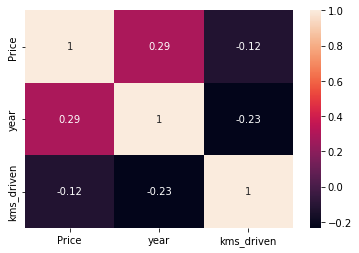

In [286]:
heatmap=sns.heatmap(df_copia2_cor,annot=True)

In [287]:
X = df_copia2_num.drop(columns=['Price'])
y = df_copia2_num['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

modello1 = LinearRegression()
modello1.fit(X_train, y_train)

LinearRegression()

In [288]:
y_pred = modello1.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 54137564.64152724
R²: 0.031852937789658586


In [289]:
def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [290]:
from sklearn.linear_model import ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1 ,1 ,10]

for alpha in alphas:
    print("Lambda is: "+str(alpha))
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))

Lambda is: 0.0001
Train set:  MSE=12237190.836472148 R2=0.12327940684875827
Test set:  MSE=54137621.805637665 R2=0.031851915518599117
Lambda is: 0.001
Train set:  MSE=12237191.20837902 R2=0.12327938020388385
Test set:  MSE=54138136.234947056 R2=0.03184271593180754
Lambda is: 0.01
Train set:  MSE=12237228.038797542 R2=0.12327674152750756
Test set:  MSE=54143283.038482025 R2=0.03175067516944319
Lambda is: 0.1
Train set:  MSE=12240607.300393911 R2=0.12303463790497082
Test set:  MSE=54195102.170444526 R2=0.030823988852687445
Lambda is: 1
Train set:  MSE=12407820.37083803 R2=0.11105483434862873
Test set:  MSE=54676364.40086454 R2=0.022217531993774076
Lambda is: 10
Train set:  MSE=13390351.4128957 R2=0.04066243714788009
Test set:  MSE=56184172.44718535 R2=-0.004746738380938309
